<a href="https://colab.research.google.com/github/swastikbanerjee/AML_Lab/blob/main/Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Dependencies

In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Importing Dataset

In [225]:
data = pd.read_csv("/content/program_5_dataset.csv")

In [226]:
data.shape

(615, 14)

In [227]:
data.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [228]:
data.describe()

,Unnamed: 0,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,615.000000,613.000000,595.000000,612.000000,613.000000,615.000000,615.000000,604.000000,614.000000,615.000000,614.000000
mean,308.000000,47.408130,41.622838,68.263529,28.493627,34.731648,11.396748,8.196634,5.368013,81.271987,39.533171,72.044137
std,177.679487,10.055105,5.784979,26.049129,25.498962,33.090023,19.673150,2.205657,1.133665,49.795186,54.661071,5.402636
min,1.000000,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,154.500000,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.607500,67.000000,15.700000,69.300000
50%,308.000000,47.000000,42.000000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,76.850000,23.300000,72.200000
75%,461.500000,54.000000,45.200000,80.100000,33.100000,32.900000,11.200000,9.590000,6.065000,88.000000,40.200000,75.400000
max,615.000000,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


In [229]:
data.isnull().sum()

Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            2
ALP           20
ALT            3
AST            2
BIL            0
CHE            0
CHOL          11
CREA           1
GGT            0
PROT           1
dtype: int64

Dropping missing values

In [230]:
data = data.dropna()

In [231]:
data.isnull().sum()

Unnamed: 0    0
Category      0
Age           0
Sex           0
ALB           0
ALP           0
ALT           0
AST           0
BIL           0
CHE           0
CHOL          0
CREA          0
GGT           0
PROT          0
dtype: int64

Our dataset is now clean

In [232]:
df1 = data
x = df1[['CREA']]
y = df1['PROT']

In [233]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Implementing Simple Linear Regression and calculating the coefficients

In [234]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

print('Intercept:',model.intercept_)
print('Coefficients',model.coef_)

Intercept: 72.21331496647235
Coefficients [-0.00362626]


Evaluating Simple Linear Regression Model

In [235]:
from sklearn.metrics import mean_squared_error as mse
y_pred = model.predict(x_test)
y_test = np.array(y_test).reshape(-1,1)
mse(y_test.reshape(-1,1),y_pred)

24.98052149031294

Calculating Variance Inflation Factor for mentioned attributes

In [236]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x = df1.drop(['Unnamed: 0','Category','Age','Sex'],axis=1)
vif = pd.Series([variance_inflation_factor(x.values,idx)
                 for idx in range(x.shape[1])],
                index=x.columns)
print(vif)

ALB      89.166626
ALP      10.736817
ALT       3.216524
AST       3.310986
BIL       1.722888
CHE      22.742672
CHOL     31.140640
CREA      3.692195
GGT       2.588358
PROT    129.812863
dtype: float64


Selecting best attributes according to VIF factor

In [237]:
x = df1[['BIL','GGT']]
vif = pd.Series([variance_inflation_factor(x.values,idx)
                 for idx in range(x.shape[1])],
                index=x.columns)
print(vif)

BIL    1.272752
GGT    1.272752
dtype: float64


In [238]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Implementing Multiple Linear Regression and calculating the coefficients

In [239]:
model = LinearRegression()
model.fit(x_train,y_train)
print("Intercept: ",model.intercept_,"\nCoefficients: ",model.coef_)

Intercept:  72.00692845165706 
Coefficients:  [ 0.00828071 -0.00484301]


Evaluating Multiple Linear Regression Model

In [240]:
y_pred = model.predict(x_test)
y_test = np.array(y_test).reshape(-1,1)
mse(y_test.reshape(-1,1),y_pred)

25.152947320636034

Selecting the feature with highest VIF score

In [241]:
x = df1[['ALB']]

In [242]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Implementing Polynomial Regression and calculating the coefficients (for degree 2)

In [243]:
from sklearn.preprocessing import PolynomialFeatures
p=PolynomialFeatures(degree=2,include_bias=True)
x_train_p=p.fit_transform(x_train)
x_test_p=p.transform(x_test)

model=LinearRegression()
model.fit(x_train_p,y_train)
print(model.coef_)
print(model.intercept_)

[ 0.          1.92168267 -0.01650093]
21.053019242586814


Evaluating Polynomial Regression Model with degree 2

In [244]:
y_pred = model.predict(x_test_p)
y_test = np.array(y_test).reshape(-1,1)
mse(y_test.reshape(-1,1),y_pred)

20.083890933197896

Implementing Polynomial Regression and calculating the coefficients (for degree 3)

In [245]:
p=PolynomialFeatures(degree=3,include_bias=True)
x_train_p=p.fit_transform(x_train)
x_test_p=p.transform(x_test)

model=LinearRegression()
model.fit(x_train_p,y_train)
print(model.coef_)
print(model.intercept_)

[ 0.00000000e+00  1.96588342e+00 -1.75023127e-02  7.06705807e-06]
20.442489097332476


Evaluating Polynomial Regression Model with degree 3

In [246]:
y_pred = model.predict(x_test_p)
y_test = np.array(y_test).reshape(-1,1)
mse(y_test.reshape(-1,1),y_pred)

20.084883661793377

Implementing Polynomial Regression and calculating the coefficients (for degree 4)

In [247]:
p=PolynomialFeatures(degree=4,include_bias=True)
x_train_p=p.fit_transform(x_train)
x_test_p=p.transform(x_test)

model=LinearRegression()
model.fit(x_train_p,y_train)
print(model.coef_)
print(model.intercept_)

[ 0.00000000e+00  4.16092720e+00 -9.85042521e-02  1.24608445e-03
 -6.60269861e-06]
-0.208760367715783


Evaluating Polynomial Regression Model with degree 4

In [248]:
y_pred = model.predict(x_test_p)
y_test = np.array(y_test).reshape(-1,1)
mse(y_test.reshape(-1,1),y_pred)

20.082153884716128

Implementing Ridge Regression and calculating best parameters and score

In [249]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge=Ridge()
parameters={'alpha':[0.001,0.01,1,5,10,20,30,35,40,45,50,55,100,150]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(x_train,y_train)

print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 150}
-20.105996309644524


Evaluating Ridge Regression Model

In [253]:
y_pred = ridge_regressor.predict(x_test)
y_test = np.array(y_test).reshape(-1,1)
mse(y_test.reshape(-1,1),y_pred)

20.0121579228739

Implementing Lasso Regression and calculating best parameters and score

In [250]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[0.001,0.01,1,5,10,20,30,35,40,45,50,55,100,150]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(x_train,y_train)

print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1}
-20.110696918144793


Evaluating Lasso Regression Model

In [255]:
y_pred = lasso_regressor.predict(x_test)
y_test = np.array(y_test).reshape(-1,1)
mse(y_test.reshape(-1,1),y_pred)

19.800770861750088

Comparative Analysis Visualization of models based on MSE values

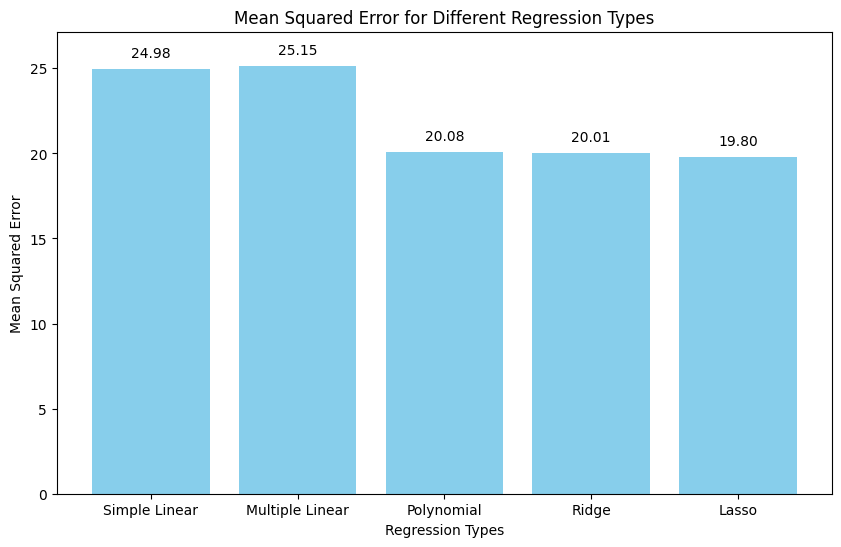

In [258]:
regression_types = ["Simple Linear", "Multiple Linear", "Polynomial", "Ridge", "Lasso"]
mse_values = [24.98, 25.15, 20.08, 20.01, 19.80]
plt.figure(figsize=(10, 6))
plt.bar(regression_types, mse_values, color='skyblue')
plt.title('Mean Squared Error for Different Regression Types')
plt.xlabel('Regression Types')
plt.ylabel('Mean Squared Error')
plt.ylim(0, max(mse_values) + 2)
for i, value in enumerate(mse_values):
    plt.text(i, value + 0.5, f'{value:.2f}', ha='center', va='bottom')
plt.show()

The prime inference that we can draw from this lab work and also from the bar chart representation of MSE values for different Regression models is that, the model gives ordinary results with Simple and Linear Regression models. When the best fit line is allowed to be non-linear, as in case of Polynomial Regression, MSE values decreases by a good margin indicating better fit on Test data.
      Upon L1 and L2 regularization as in case of Lasso and
Ridge Regression, model fits better on test data upon generalization although the nature of graph remains linear.